# Importation des Images et cration du jeu de données

In [1]:
# pip install -r C:/Users/paulz/Desktop/projet_master/requierments.txt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\paulz\Desktop\projet_master\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [44]:
# Importation des packages
import os
from PIL import Image
import cv2
# import imutils
import numpy as np
from torchvision.transforms import v2

# Imporattion des packages sklearn pour knn et svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# Pour les graphique
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap


## Enhance Data: Brightness Modifier

In [2]:
# Modification de l'image: Luminosité
# def apply_brightness_modif(img_file, folder_path):

#     img = Image.open('flags_rgb/%s.png'%img_file).convert('RGB')
#     img.thumbnail((512,512))

#     enhancer = ImageEnhance.Brightness(img)
#     factor = [0.05, 0.2,0.5,1.5,2,3,4,6,8,10]
#     for f in factor:
#         # Si le facteur i est en dessous de 1 l'image est sous exposé, et inversemment
#         bright_img = enhancer.enhance(f)
#         bright_img.save('{0}/{1}_bright_{2}.png'.format(folder_path,img_file,f))

## Enhance Data: Noise Modifier

In [3]:
def add_gaussian_noise(img, mean = 0, std = 25):

    noise = np.random.normal(mean, std, img.shape).astype(np.uint8)
    noisy_img = cv2.add(img, noise)

    return noisy_img

# def apply_noise_modif(img_file, folder_path):

#     img = cv2.imread('flags_rgb/%s.png'%img_file)
#     img = imutils.resize(img, width = 512)
    
#     for i in range(1,11):
#         std = round(10**(i/5))
#         noisy_img = add_gaussian_noise(img,0,std)
    
#         cv2.imwrite('{0}/{1}_noise_{2}.png'.format(folder_path,img_file,std), noisy_img)

## Enhance Data: Wave Modifier

In [4]:
# def apply_wave_modif(img_file, folder_path):

#     img = Image.open('flags_rgb/%s.png'%img_file).convert('RGBA')
#     img.thumbnail((512,512))

#     for a in range(1,11):
#         # modification du param exponentiel pour avoir des résultat plus "extrème"
#         alpha = a**3

#         # Applique la déformation suivant le niveau alpha
#         elastic_transformer = v2.ElasticTransform(alpha=alpha)
#         wavey_img = elastic_transformer(img)
#         wavey_img.save('{0}/{1}_wave_{2}.png'.format(folder_path,img_file,alpha))

In [5]:
from cv2 import blur, transform


def img_data_augmentation(img_file, folder_path):

    img = Image.open('flags/%s.png'%img_file).convert('RGBA')
    img.thumbnail((512,512))

    bright_transformer = v2.ColorJitter(brightness=1, contrast=1, saturation=0.4)
    rotation_transformer = v2.RandomRotation(degrees=(-20,20))
    blur_transformer = v2.GaussianBlur(kernel_size=15, sigma=(0.1, 5))
    perspective_transformer = v2.RandomPerspective(distortion_scale=0.5, p=1)
    wave_transformer = v2.ElasticTransform(alpha=125)
    
    for i in range(1,11):
        
        bright = bright_transformer(img)
        bright.save(f'{folder_path}/{img_file}_bright_{i}.png')
        bright_rota = rotation_transformer(bright)
        bright_rota.save(f'{folder_path}/{img_file}_bright_rota_{i}.png')
        bright_blur = blur_transformer(bright)
        bright_blur.save(f'{folder_path}/{img_file}_bright_blur_{i}.png')
        bright_per = perspective_transformer(bright)
        bright_per.save(f'{folder_path}/{img_file}_bright_per_{i}.png')
        bright_wave = wave_transformer(bright)
        bright_wave.save(f'{folder_path}/{img_file}_bright_wave_{i}.png')

        rota = rotation_transformer(img)
        rota.save(f'{folder_path}/{img_file}_rota_{i}.png')
        rota_blur = blur_transformer(rota)
        rota_blur.save(f'{folder_path}/{img_file}_rota_blur_{i}.png')
        rota_per = perspective_transformer(rota)
        rota_per.save(f'{folder_path}/{img_file}_rota_per_{i}.png')
        rota_wave = wave_transformer(rota)
        rota_wave.save(f'{folder_path}/{img_file}_rota_wave_{i}.png')

        blur = blur_transformer(img)
        blur.save(f'{folder_path}/{img_file}_blur_{i}.png')
        blur_per = perspective_transformer(blur)
        blur_per.save(f'{folder_path}/{img_file}_blur_per_{i}.png')
        blur_wave = wave_transformer(blur)
        blur_wave.save(f'{folder_path}/{img_file}_blur_wave_{i}.png')

        wave = wave_transformer(img)
        wave.save(f'{folder_path}/{img_file}_wave_{i}.png')

## Create Dataset

In [6]:
FLAG_LIST_DIR = 'flag_list.txt'
DATASET_DIR = 'C:/Users/paulz/Desktop/projet_master/input_data'

with open(FLAG_LIST_DIR, 'r') as f:
    flags = [line[:-1] for line in f]

selected_flags = np.random.choice(flags,10)

# Crée ou détruit le dossier d'inputs
if not os.path.exists(DATASET_DIR):
    os.makedirs(DATASET_DIR)       

    for flag in selected_flags:

        flag_dir = '{0}/{1}'.format(DATASET_DIR,flag)

        if os.path.exists(flag_dir) == False:
            os.makedirs(flag_dir)

            img_data_augmentation(flag, flag_dir)

        # apply_brightness_modif(flag,flag_dir)
        # apply_noise_modif(flag,flag_dir)
        # apply_wave_modif(flag,flag_dir)
else:
    print('Input Folder already exists.')

print('Flags: ')

Input Folder already exists.
Flags: 


## KNN Classification

In [8]:
def load_images(input_dir):
    images = []
    labels = []

    for folder in os.listdir(input_dir):

        label_folder = os.path.join(input_dir, folder)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)
                    labels.append(folder)
    return images, labels

images, labels = load_images(DATASET_DIR)
print(len(images), labels)

1300 ['dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'dz', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj', 'fj'

In [9]:
def preprocess_images(images, size=(64, 64)):
    preprocessed_images = []
    for img in images:
        # Resize image
        resized_img = cv2.resize(img, size)
        # Flatten the image
        flattened_img = resized_img.flatten()
        preprocessed_images.append(flattened_img)
    return np.array(preprocessed_images)

In [40]:
images, labels = load_images(DATASET_DIR)
images = preprocess_images(images, (64 ,64))
labels = np.array(labels)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(images,
                                                    encoded_labels,
                                                    test_size=0.2,
                                                    random_state=1)

In [10]:
# Paramètres pour le nombre de voisins
k_par = list(range(1, 31))
param_dict = {"n_neighbors": k_par}
n_cv = 4
# Recherche sur grille avec CV
knn_classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_classifier, 
                                param_dict,
                                verbose=3,
                                cv=n_cv)
grid_search_knn.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[CV 1/4] END .....................n_neighbors=1;, score=0.950 total time=   0.1s
[CV 2/4] END .....................n_neighbors=1;, score=0.942 total time=   0.1s
[CV 3/4] END .....................n_neighbors=1;, score=0.942 total time=   0.1s
[CV 4/4] END .....................n_neighbors=1;, score=0.935 total time=   0.1s
[CV 1/4] END .....................n_neighbors=2;, score=0.938 total time=   0.2s
[CV 2/4] END .....................n_neighbors=2;, score=0.935 total time=   0.1s
[CV 3/4] END .....................n_neighbors=2;, score=0.931 total time=   0.0s
[CV 4/4] END .....................n_neighbors=2;, score=0.915 total time=   0.1s
[CV 1/4] END .....................n_neighbors=3;, score=0.931 total time=   0.1s
[CV 2/4] END .....................n_neighbors=3;, score=0.915 total time=   0.1s
[CV 3/4] END .....................n_neighbors=3;, score=0.923 total time=   0.1s
[CV 4/4] END .....................n_neighbors=3

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             verbose=3)

In [11]:
accuracy_knn_test = grid_search_knn.best_estimator_.score(X_test, y_test)
best_k = grid_search_knn.best_params_["n_neighbors"]
print(f"kNN: meilleure paramètre k = {best_k}")
print(f"kNN: meilleure exactitude d'entrainement = "
      f"{grid_search_knn.best_score_: .2%}")
print(f"kNN: meilleure exactitude de test = {accuracy_knn_test: .2%}")

kNN: meilleure paramètre k = 1
kNN: meilleure exactitude d'entrainement =  94.23%
kNN: meilleure exactitude de test =  95.77%


# SVM

In [41]:
#paramètres du SVC
gamma_par = [1, 0.1, 0.01, 0.001, 0.0001]#np.linspace(0.001, 0.1, 10)
# kernels = ['poly', 'rbf', 'sigmoid']
# param_dict = {"C": [3], "kernel": kernels, "gamma": gamma_par}
# defining parameter range 
param_dict = {'C': [0.1, 0.3, 0.6, 0.8,1],  
              'gamma': [0.5,1,1.5,2,2.5], 
              'kernel': ['linear','poly']}  # 'rbf', 'sigmoid'
n_cv = 4

#Cross-validation
svm_classifier = SVC()
grid_search_svm = GridSearchCV(svm_classifier,
                               param_dict,
                               cv=n_cv,
                               verbose = 3
                               )
grid_search_svm.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV 1/4] END ...C=0.1, gamma=0.5, kernel=linear;, score=0.973 total time=   2.8s
[CV 2/4] END ...C=0.1, gamma=0.5, kernel=linear;, score=0.969 total time=   1.9s
[CV 3/4] END ...C=0.1, gamma=0.5, kernel=linear;, score=0.965 total time=   4.6s
[CV 4/4] END ...C=0.1, gamma=0.5, kernel=linear;, score=0.962 total time=   1.9s
[CV 1/4] END .....C=0.1, gamma=0.5, kernel=poly;, score=0.900 total time=   2.4s
[CV 2/4] END .....C=0.1, gamma=0.5, kernel=poly;, score=0.888 total time=   2.2s
[CV 3/4] END .....C=0.1, gamma=0.5, kernel=poly;, score=0.896 total time=   2.7s
[CV 4/4] END .....C=0.1, gamma=0.5, kernel=poly;, score=0.896 total time=   2.8s
[CV 1/4] END .....C=0.1, gamma=1, kernel=linear;, score=0.973 total time=   3.4s
[CV 2/4] END .....C=0.1, gamma=1, kernel=linear;, score=0.969 total time=   5.3s
[CV 3/4] END .....C=0.1, gamma=1, kernel=linear;, score=0.965 total time=   2.8s
[CV 4/4] END .....C=0.1, gamma=1, kernel=linear

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 0.3, 0.6, 0.8, 1],
                         'gamma': [0.5, 1, 1.5, 2, 2.5],
                         'kernel': ['linear', 'poly']},
             verbose=3)

[]

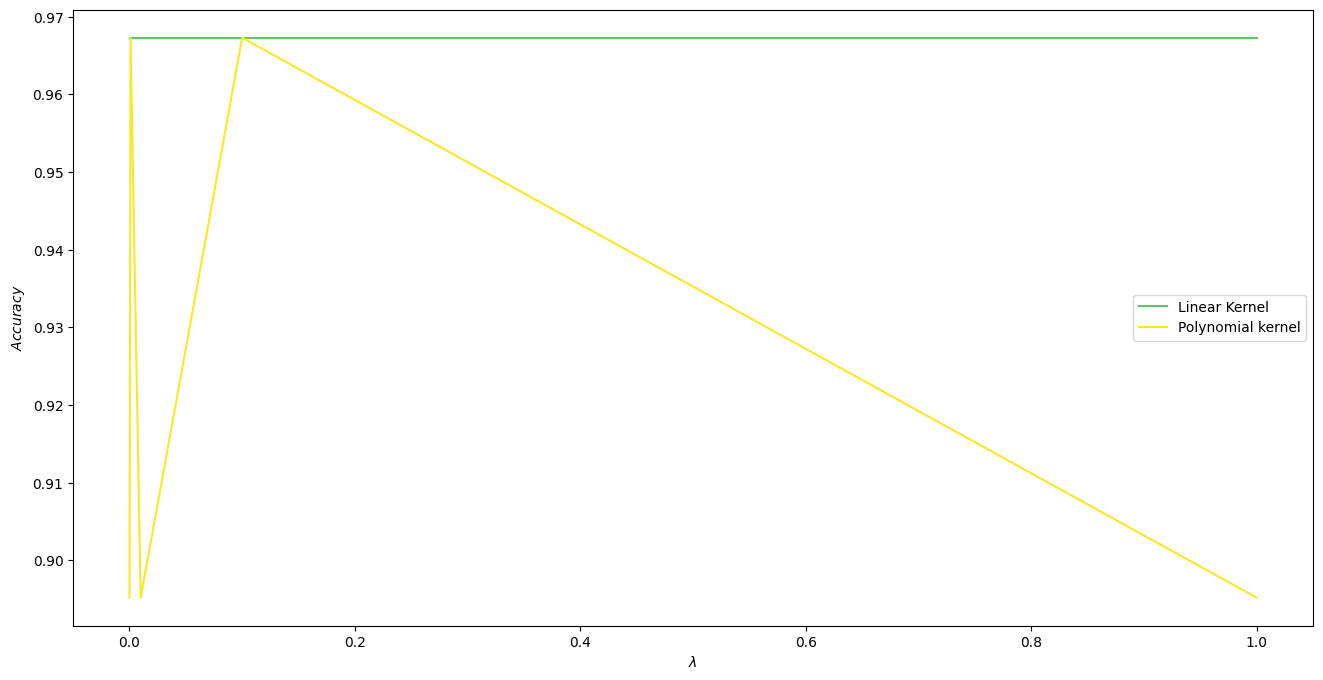

In [43]:
#exactitude moyenne par cv (renvoie une liste des scores avec les trois kernels)
accuracy = grid_search_svm.cv_results_['mean_test_score']

#récupération du score pour chaque kernel
linear_accuracy = accuracy[0::2][0:5]
poly_accuracy = accuracy[1::3][0:5]
# rbf_accuracy = accuracy[2::4]
# sig_accuracy = accuracy[3::4]

#Graphique pour de l'exactitude en fonction de lambda
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(gamma_par, linear_accuracy, c='#5ec962', label='Linear Kernel')
ax.plot(gamma_par, poly_accuracy, c="#fde725", label="Polynomial kernel")
# ax.plot(gamma_par, rbf_accuracy, c="#21918c", label="Rbf kernel")
# ax.plot(gamma_par, sig_accuracy, c="#440154", label="Sigmoid kernel")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("$Accuracy$")
ax.legend()
plt.plot()

In [42]:
#Meilleurs paramètres et exactitude de la cv
print(f"SVM: meilleures paramètres: {grid_search_svm.best_params_}")
print(f"avec{grid_search_svm.best_score_: .2%} d'exactitude.\n")

#SVM avec les meilleurs paramètres
best_kernel = grid_search_svm.best_params_['kernel']
best_gamma = grid_search_svm.best_params_['gamma']
best_C = grid_search_svm.best_params_['C']

best_svm = SVC(C=best_C,kernel=best_kernel, gamma=best_gamma)
best_svm.fit(X_train, y_train)

outputs_svm_train = (best_svm.predict(X_train))
outputs_svm_test = (best_svm.predict(X_test))

#Calcul et affichage de l'exactitude
accuracy_svm_train = accuracy_score(y_train, outputs_svm_train)
accuracy_svm_test = accuracy_score(y_test, outputs_svm_test)
print(f'Exactitude: {accuracy_svm_train:.2%} (train) & {accuracy_svm_test:.2%}\
 (test)')

#Calcul et affichage de la precision
precision_svm_train = precision_score(y_train, outputs_svm_train,
                                      average='weighted')
precision_svm_test = precision_score(y_test, outputs_svm_test, 
                                     average='weighted')
print(f'Précision: {precision_svm_train:.2%} (train) & {precision_svm_test:.2%}\
 (test)')

#Calcul et affichage du rappel
recall_svm_train = recall_score(y_train, outputs_svm_train,
                                average='weighted')
recall_svm_test = recall_score(y_test, outputs_svm_test,
                               average='weighted')
print(f'Rappel: {recall_svm_train:.2%} (train) & {recall_svm_test:.2%} (test)')

#Calcul et affichage des scores f1
f1_svm_train = f1_score(y_train, outputs_svm_train,
                        average='weighted')
f1_svm_test = f1_score(y_test, outputs_svm_test, average='weighted')
print(f'Score F1: {f1_svm_train:.2%} (train) & {f1_svm_test:.2%} (test)')

SVM: meilleures paramètres: {'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}
avec 96.73% d'exactitude.

Exactitude: 100.00% (train) & 97.31% (test)
Précision: 100.00% (train) & 97.39% (test)
Rappel: 100.00% (train) & 97.31% (test)
Score F1: 100.00% (train) & 97.29% (test)


# CNN

In [ ]:
# Packages import